# <font color='red'>Ce code entraîne et évalue un réseau de neurones simple </br> pour reconnaître le nombre 5 dans les images de l'ensemble de données MNIST</font>

### Les bibliothèques nécessaires sont importées.

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

### Charger le dataset de données MNIST

In [23]:
#chargement de données
mnist=keras.datasets.mnist
#Diviser le dataset de données en dataset d'entraînement et de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normaliser les valeurs de pixels
x_train = x_train / 255.0
x_test = x_test / 255.0


### Modifier les étiquettes pour qu'elles soient binaires : 1 si l'image est un 5, 0 sinon

In [24]:
#1 si l'image est un 5, 0 sinon
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Définir le modèle

In [25]:
model = keras.Sequential([
    # Aplatir les images 28x28 en des tableaux 1D
    keras.layers.Flatten(input_shape=(28, 28)),
    # Ajouter une couche cachée entièrement connectée (Dense) avec 64 unités et une activation ReLU
    keras.layers.Dense(64, activation='relu'),
    # Ajouter une couche de sortie sigmoïde avec une seule unité
    keras.layers.Dense(1, activation='sigmoid')
])
#sigmoid pour les  "binary problems"

### Compiler le modèle avec l'optimiseur Adam, la perte de croisement binaire et la métrique de précision

In [26]:
# Compiler le modèle
model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

### Entraîner le modèle pendant 5 epochs et évaluer le modèle sur l'ensemble de test

In [27]:
#5 epochs
model.fit(x_train, y_train_5, epochs=5)
#En réglant verbose  2, nous disons simplement comment on veut "voir" la progression de l'entraînement pour chaque époque.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
## Afficher la précision de test
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9808
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096 - accuracy: 0.9969
313/313 - 0s - loss: 47.0370 - accuracy: 0.0977 - 467ms/epoch - 1ms/step

Test accuracy: 0.09769999980926514


### une simple méthode pour faire et visualiser une prédiction

1/1 [==============================] - 0s 51ms/step
 this is not a 5


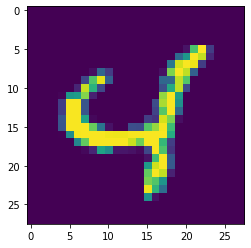

In [28]:
# Sélectionner une image au hasard dans l'ensemble de test et faire une prédiction
image = x_test[random.randint(0,255)]
# [0][0] pour rendre la premiere prédiction de la première classe seulement
prediction = model.predict(image.reshape(1, 28, 28))[0][0]

# Afficher la prédiction et l'image
if prediction > 0.5:
  print("this is a 5")
else:
  print(" this is not a 5")
plt.imshow(image)
plt.show()